# MNIST pre-processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

image_size = 28    # width and length
no_of_different_labels = 10    #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

train_data = np.loadtxt("mnist_train.csv",delimiter=",")
test_data = np.loadtxt("mnist_test.csv",delimiter=",")

In [2]:
train_data[:10]
train_data[train_data==255]
train_data.shape

(60000, 785)

In [3]:
sacling = 0.99/255
train_imgs = np.asfarray(train_data[:, 1:]) *sacling +0.01
test_imgs = np.asfarray(test_data[:, 1:]) *sacling +0.01
train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])
print(train_labels)

[[5.]
 [0.]
 [4.]
 ...
 [5.]
 [6.]
 [8.]]


In [4]:
import numpy as np
lr = np.arange(10)
for label in range(10):
    one_hot = (lr==label).astype(np.int)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  1  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  3  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  5  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  6  in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
label:  7  in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
label:  8  in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
label:  9  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]


In [5]:
lr = np.arange(no_of_different_labels)
# transform labels into one hot representation
train_labels_one_hot = (lr==train_labels).astype(np.float)
test_labels_one_hot = (lr==test_labels).astype(np.float)

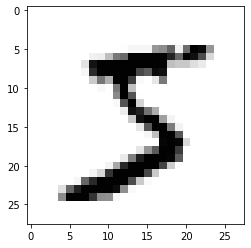

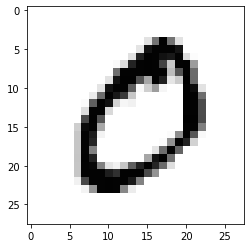

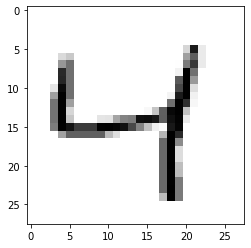

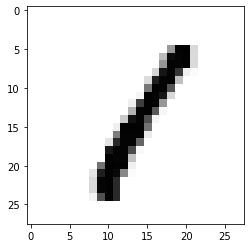

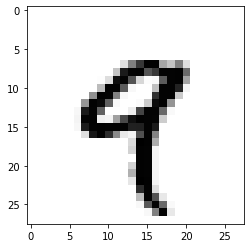

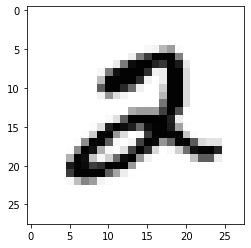

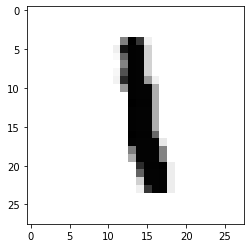

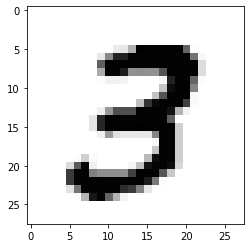

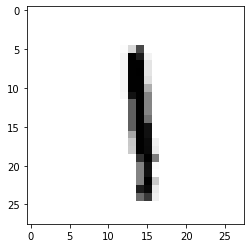

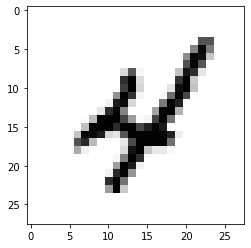

In [6]:
for i in range(10):
    img = train_imgs[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

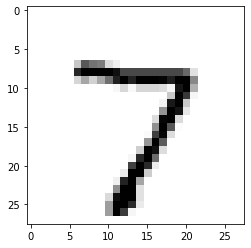

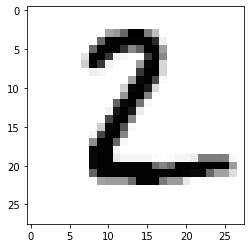

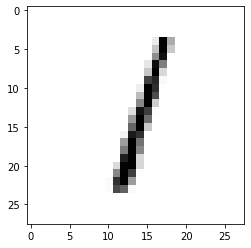

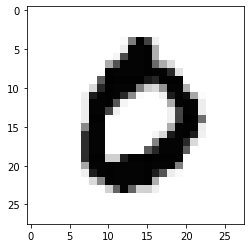

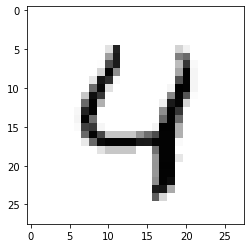

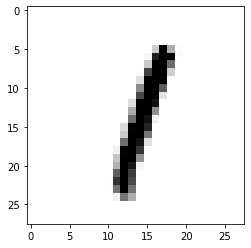

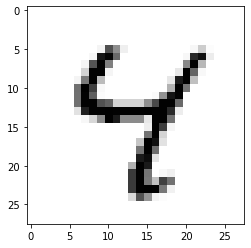

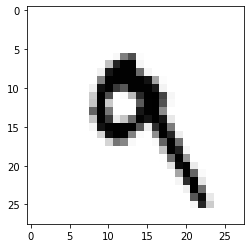

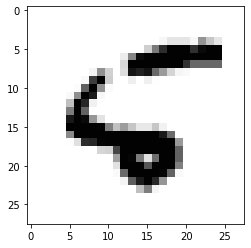

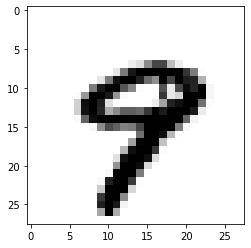

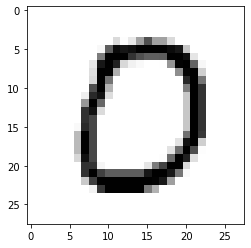

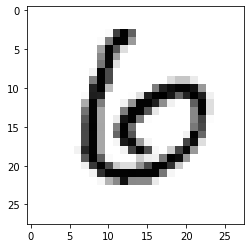

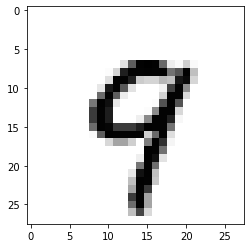

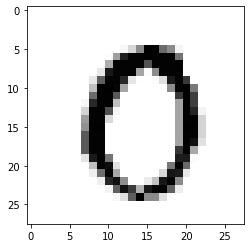

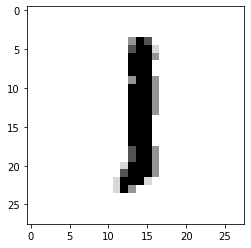

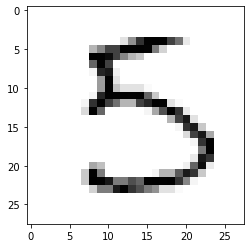

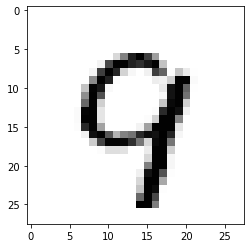

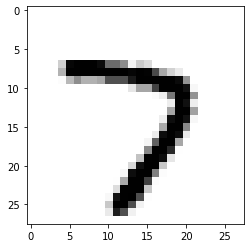

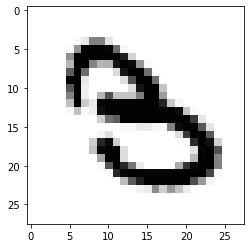

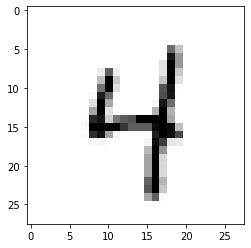

In [7]:
for i in range(20):
    img = test_imgs[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

In [8]:
import pickle
with open(r"C:\Users\User\Desktop\論文(Thesis research)\Classification with MNIST\pickled_mnist.pkl", "wb") as fh:
    data = (train_imgs,
            test_imgs,
            train_labels,
            test_labels,
            train_labels_one_hot,
            test_labels_one_hot)
    pickle.dump(data, fh)

# pickle簡介

pickle模塊是python中用來持久化對象的一個模塊。所謂對對象進行持久化，即將對象的數據類型、存儲結構、存儲內容等所有信息作為文件保存下來以便下次使用。

就比如說你通過pickle將一個數組保存成了文件，那麼當你下次通過pickle將這個文件讀取出來的時候，你讀取到的依然是一個數組，而不是一個看起來長得像數組的字符串。

打開(或創建)一個名為 data.pkl的文件，打開方式為二進制寫入(參數'wb')

通過pickle模塊中的dump函數將data保存到 data.pkl文件中。

In [9]:
import pickle
with open(r"C:\Users\User\Desktop\論文(Thesis research)\Classification with MNIST\pickled_mnist.pkl", "rb") as fh:
    data = pickle.load(fh)

train_imgs = data[0]
test_imgs = data[1]
train_labels = data[2]
test_labels = data[3]
train_labels_one_hot = data[4]
test_labels_one_hot = data[5]

image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

In [10]:
print('train_imgs:',data[0].shape, '\n', data[0])
print('train_labels:',data[2].shape, '\n', data[2])
print('train_labels_one_hot:',data[4].shape, '\n', data[4])
print('test_imgs:',data[1].shape, '\n', data[1])
print('test_labels:',data[3].shape, '\n', data[3])
print('test_labels_one_hot:',data[5].shape, '\n', data[5])

train_imgs: (60000, 784) 
 [[0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 ...
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]]
train_labels: (60000, 1) 
 [[5.]
 [0.]
 [4.]
 ...
 [5.]
 [6.]
 [8.]]
train_labels_one_hot: (60000, 10) 
 [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
test_imgs: (10000, 784) 
 [[0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 ...
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]]
test_labels: (10000, 1) 
 [[7.]
 [2.]
 [1.]
 ...
 [4.]
 [5.]
 [6.]]
test_labels_one_hot: (10000, 10) 
 [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0